In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance
from xgboost import to_graphviz
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("carseats.csv")

In [3]:
df

,ID,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [5]:
df.shape

(400, 12)

In [6]:
df.describe()

,ID,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df = df.drop('ID',axis=1)

In [8]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

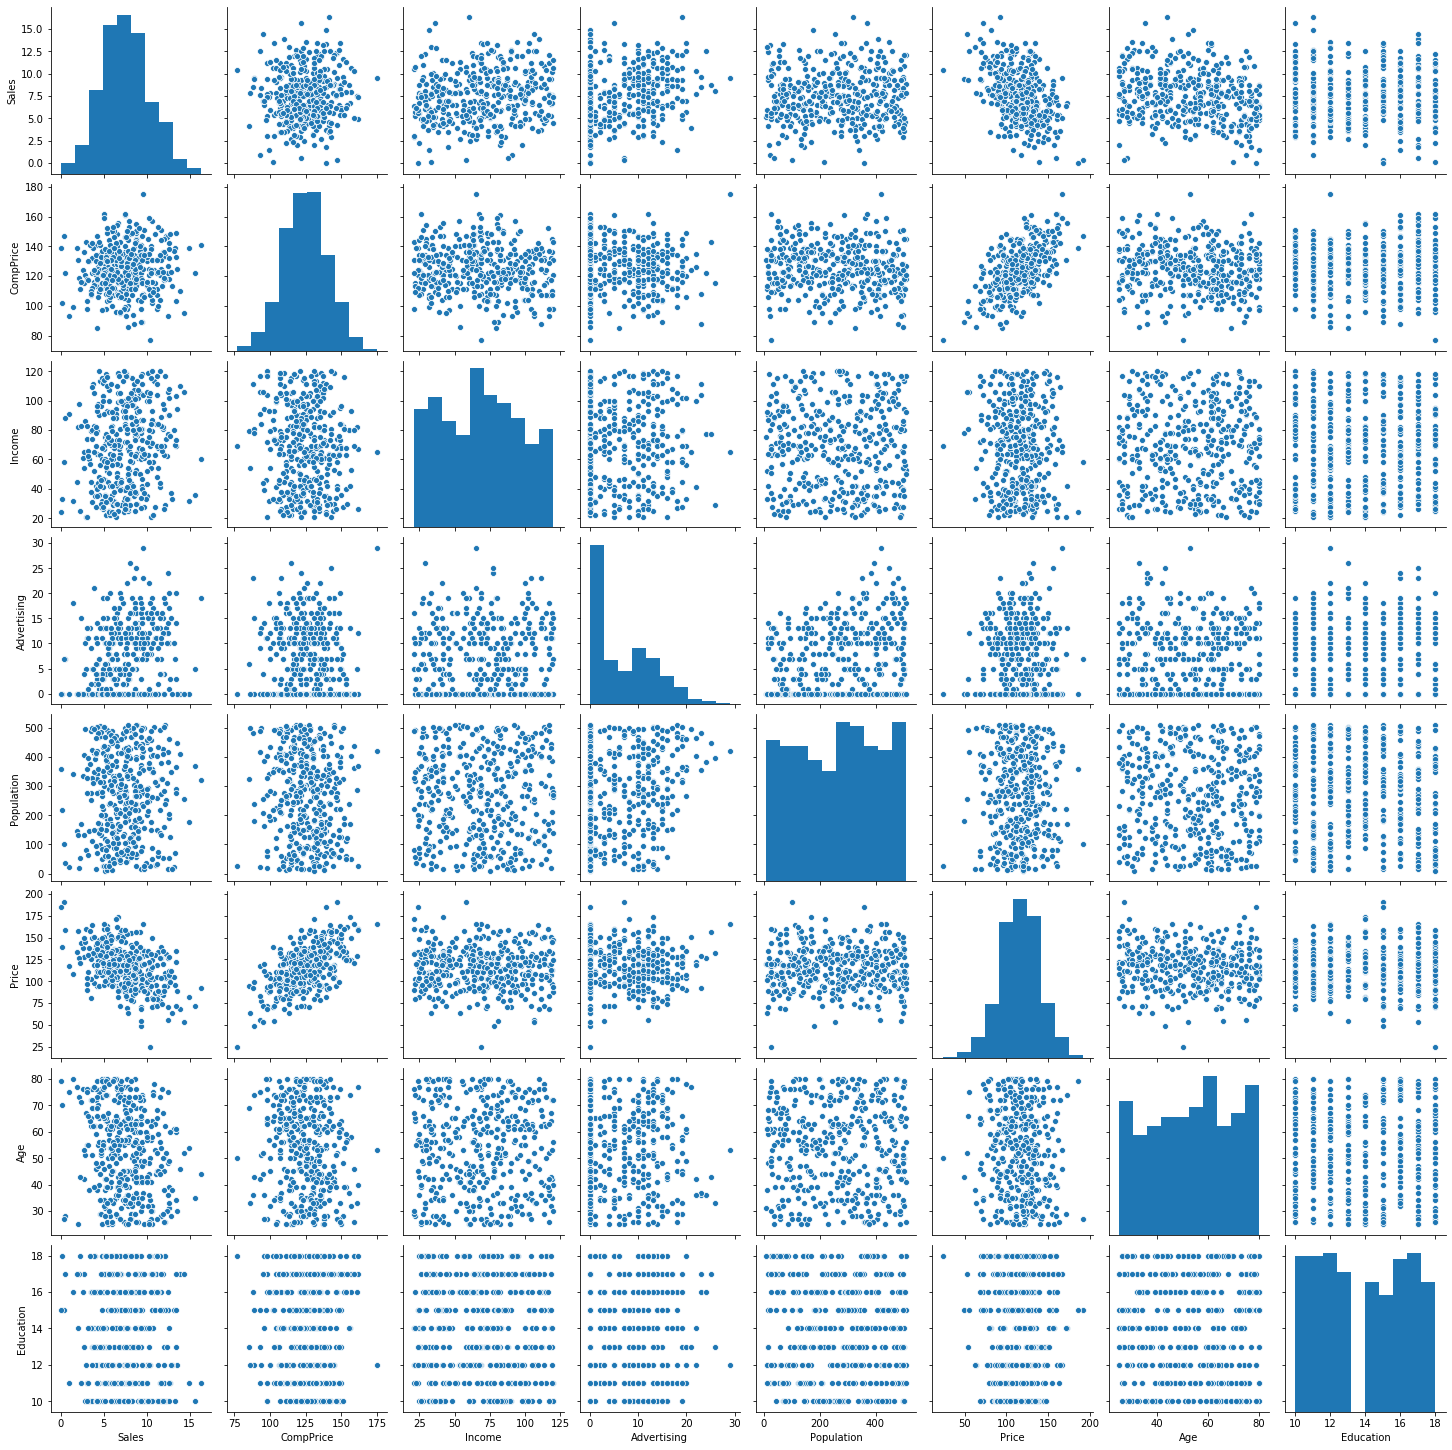

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [12]:
df['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [13]:
df['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

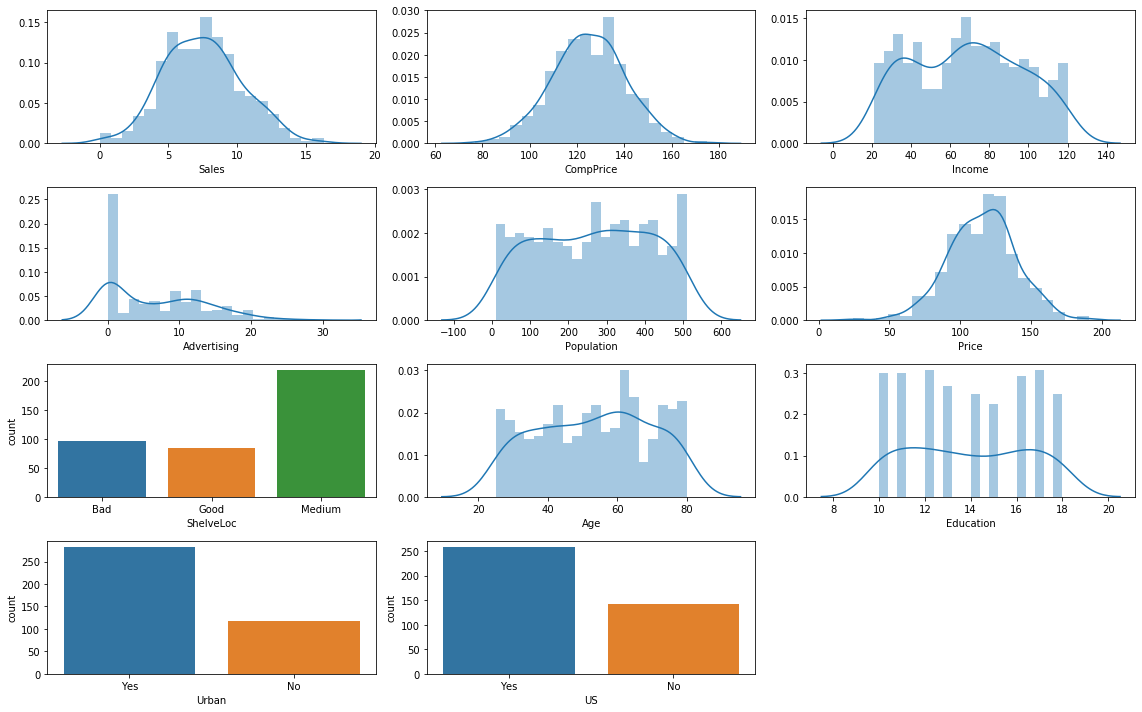

In [14]:
plt.figure(figsize=(16,10))
plt.subplot(4,3,1)
sns.distplot(a=df.Sales,bins=20)
plt.subplot(4,3,2)
sns.distplot(a=df.CompPrice,bins=20)
plt.subplot(4,3,3)
sns.distplot(a=df.Income,bins=20)

plt.subplot(4,3,4)
sns.distplot(a=df.Advertising,bins=20)
plt.subplot(4,3,5)
sns.distplot(a=df.Population,bins=20)
plt.subplot(4,3,6)
sns.distplot(a=df.Price,bins=20)

plt.subplot(4,3,7)
sns.countplot(x=df.ShelveLoc)
plt.subplot(4,3,8)
sns.distplot(a=df.Age,bins=20)
plt.subplot(4,3,9)
sns.distplot(a=df.Education,bins=20)

plt.subplot(4,3,10)
sns.countplot(x=df.Urban)
plt.subplot(4,3,11)
sns.countplot(x=df.US)


plt.tight_layout()

In [15]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


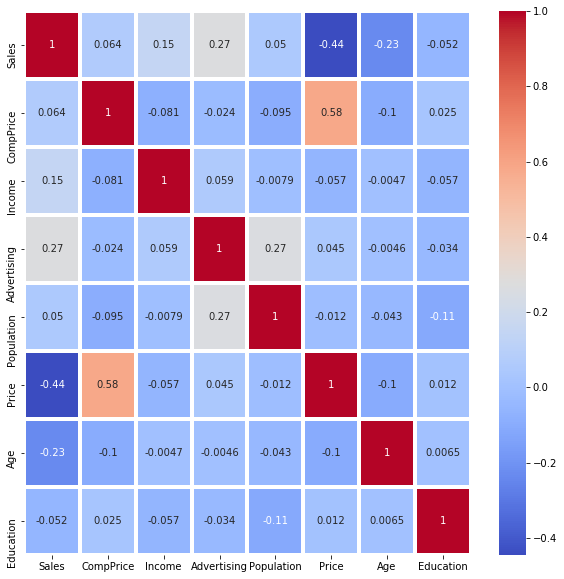

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2g',linewidths=3)
plt.show()

In [17]:
df2 = pd.get_dummies(data=df, drop_first=True)

In [18]:
df2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


In [19]:
X = df2.iloc[:,1:12]
y = df2.iloc[:,0]

In [20]:
X.values, y.values

(array([[138,  73,  11, ...,   0,   1,   1],
        [111,  48,  16, ...,   0,   1,   1],
        [113,  35,  10, ...,   1,   1,   1],
        ...,
        [162,  26,  12, ...,   1,   1,   1],
        [100,  79,   7, ...,   0,   1,   1],
        [134,  37,   0, ...,   0,   1,   1]], dtype=int64),
 array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
         4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
        13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
         5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
         8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
         4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
         4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
         8.47,  7.8 ,  4.9 ,  8.85,  9.01, 13.39,  7.99,  9.46,  6.5 ,
         5.52, 12.61,  6.2 ,  8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,
         7.52, 11.62,  4.42,  2.23,  8.47,  8.7 , 11.7 ,  6.56,

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train.shape, X_test.shape

((320, 11), (80, 11))

In [23]:
xgbmodel = XGBRegressor(objective='reg:squarederror',random_state=0,n_estimators=200)

In [24]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=10,eval_metric='rmse')

[0]	validation_0-rmse:7.09782
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:6.46915
[2]	validation_0-rmse:5.92358
[3]	validation_0-rmse:5.43199
[4]	validation_0-rmse:4.98623
[5]	validation_0-rmse:4.60101
[6]	validation_0-rmse:4.24376
[7]	validation_0-rmse:3.94601
[8]	validation_0-rmse:3.65322
[9]	validation_0-rmse:3.3838
[10]	validation_0-rmse:3.16964
[11]	validation_0-rmse:2.97059
[12]	validation_0-rmse:2.81424
[13]	validation_0-rmse:2.67097
[14]	validation_0-rmse:2.52077
[15]	validation_0-rmse:2.39735
[16]	validation_0-rmse:2.31984
[17]	validation_0-rmse:2.2116
[18]	validation_0-rmse:2.12022
[19]	validation_0-rmse:2.06652
[20]	validation_0-rmse:1.993
[21]	validation_0-rmse:1.94491
[22]	validation_0-rmse:1.89674
[23]	validation_0-rmse:1.8395
[24]	validation_0-rmse:1.80284
[25]	validation_0-rmse:1.77046
[26]	validation_0-rmse:1.73985
[27]	validation_0-rmse:1.70714
[28]	validation_0-rmse:1.68079
[29]	validation_0-rmse:1.6479
[30]	validation_0-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [25]:
y_pred = xgbmodel.predict(X_test)

In [26]:
y_pred

array([ 6.830055 ,  7.7525973,  6.69046  ,  3.1969767,  6.2660823,
        7.6677785,  8.391278 ,  5.685248 ,  5.347879 ,  6.3685255,
        6.044345 ,  4.4841332,  6.164063 , 13.523934 ,  4.355491 ,
        5.849906 , 11.790668 ,  7.5598135,  4.4030466,  5.5191627,
        6.8133626,  7.8124104,  8.323225 ,  8.361546 ,  6.1505694,
        8.206188 ,  4.3501024,  5.310673 ,  7.1084747,  6.6503344,
        7.1382613, 10.394001 ,  8.444284 ,  8.032615 ,  4.953836 ,
        9.06155  ,  6.7365866,  4.904306 ,  6.1950955,  9.880559 ,
        8.011375 ,  8.966591 ,  6.253919 , 11.043139 ,  6.5799804,
        4.987927 ,  7.678261 ,  6.904865 , 10.634694 ,  8.94098  ,
        4.1260195,  9.919753 , 12.659381 ,  7.402485 ,  4.821792 ,
        9.275775 ,  6.3590355,  7.413197 ,  8.998474 ,  4.8968287,
        7.465737 , 12.645408 ,  5.8114414,  5.411333 ,  6.768047 ,
        7.9292903,  9.361124 ,  8.33124  ,  8.563823 ,  6.4491343,
       10.287492 ,  9.01022  , 11.985123 ,  5.9989114,  7.5696

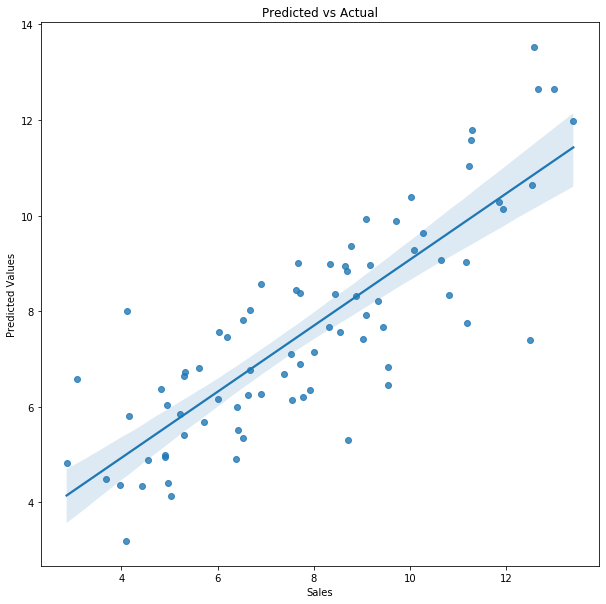

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("Predicted vs Actual")
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
sns.regplot(x=y_test,y=y_pred,ax=ax)
plt.show()

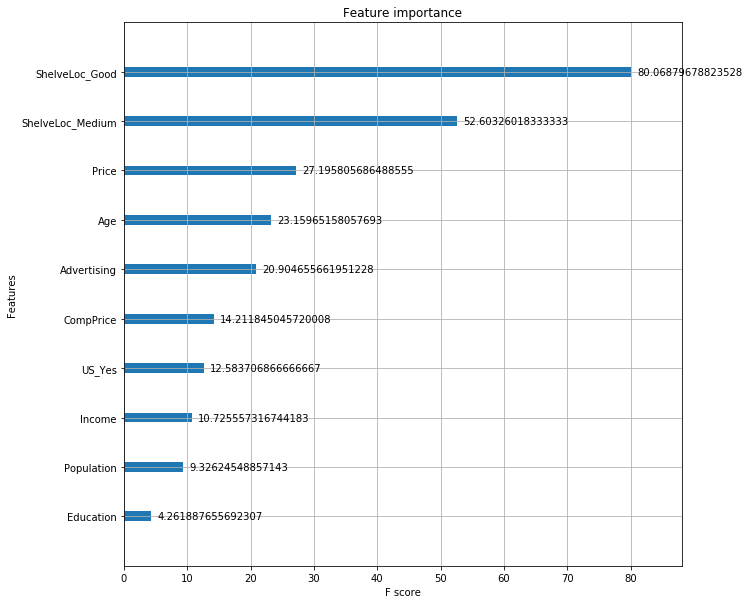

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgbmodel,ax=ax,importance_type='gain')
plt.show()

In [29]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is",mse)

Mean Squared Error is 2.226055569574452


In [30]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is",rmse)

Root Mean Squared Error is 1.4919971747876912


In [31]:
crossvalidate = cross_val_score(xgbmodel,X,y,scoring='neg_mean_squared_error',cv=5)

In [32]:
crossvalidate

array([-2.22995946, -1.78601883, -1.80751272, -1.89847686, -1.7422439 ])

In [33]:
abs(crossvalidate)

array([2.22995946, 1.78601883, 1.80751272, 1.89847686, 1.7422439 ])

In [34]:
np.mean(abs(crossvalidate))

1.8928423522506992

In [35]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']